## Loan Prediction

The goal is to determine what applicants qualify for a loan.

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib inline

df_train = pd.read_csv("data/train_ctrUa4K.csv")
df_test = pd.read_csv("data/test_lAUu6dG.csv")

print("Training Dataset")
df_train.head(10)

Training Dataset


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [2]:
print("Testing Dataset")
df_test.head(10)

Testing Dataset


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
5,LP001054,Male,Yes,0,Not Graduate,Yes,2165,3422,152.0,360.0,1.0,Urban
6,LP001055,Female,No,1,Not Graduate,No,2226,0,59.0,360.0,1.0,Semiurban
7,LP001056,Male,Yes,2,Not Graduate,No,3881,0,147.0,360.0,0.0,Rural
8,LP001059,Male,Yes,2,Graduate,NaN,13633,0,280.0,240.0,1.0,Urban
9,LP001067,Male,No,0,Not Graduate,No,2400,2400,123.0,360.0,1.0,Semiurban


### Feature Descriptions

* Loan_ID           - Unique Loan ID
* Gender            - Male/ Female
* Married           - Applicant married (Y/N)
* Dependents        - # of dependents
* Education         - Applicant Education (Graduate / Under Graduate)
* Self_Employed     - Self employed (Y/N)
* ApplicantIncome   - Applicant income
* CoApplicantIncome - CoApplicant income
* LoanAmount        - Loan amount in thousands
* Loan_Amount_Term  - Term of loan in months
* Credit_History    - credit history meets guidelines (1/0)
* Property_Area     - Urban / Semi Urban / Rural
* Loan_Status       - Loan Approved (Y/N)




In [3]:
df_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


* LoanAmount is missing 22 values
* Loan_Amount_term is missing 14 values
* Credit_History is missing 50 values

In [4]:
df_train['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [5]:
df_train['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

#### Distribution Analysis

Now we look at the distribution of ApplicantIncome and LoanAmount

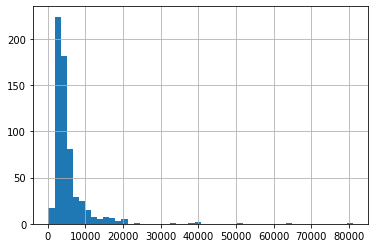

In [6]:
df_train['ApplicantIncome'].hist(bins=50)

There are extreme values between 0 and 10k. Just to confirm we will check it again with a box and whisker plot.

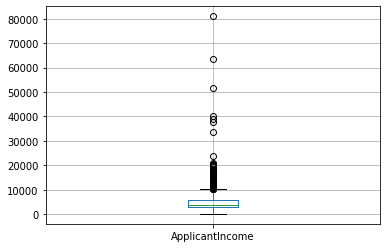

In [7]:
df_train.boxplot(column='ApplicantIncome')

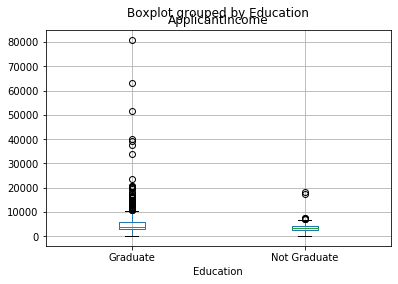

In [8]:
df_train.boxplot(column='ApplicantIncome', by='Education')

Now lets look at a histogram and box and whisker plot of LoanAmount.

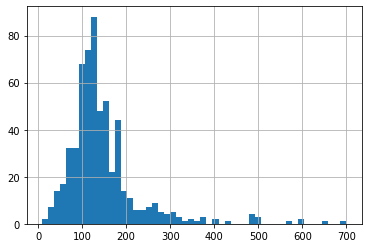

In [9]:
df_train['LoanAmount'].hist(bins=50)

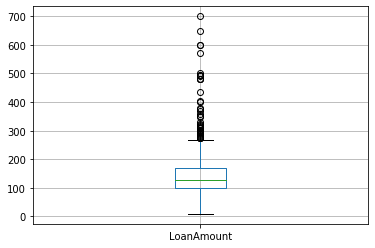

In [10]:
df_train.boxplot(column='LoanAmount')

There are also some extreme values in LoanAmount. This mean we will need to employ some other techniques also known as data munging to improve the quality of data.

#### Categorical Variable Analysis

Now we look at the categorical data and convert the yes and no values to numerical 0 and 1.


In [11]:
temp1 = df_train['Credit_History'].value_counts(ascending=True)
temp2 = df_train.pivot_table(values='Loan_Status', index=['Credit_History'], aggfunc=lambda x: x.map({'Y':1, 'N':0}).mean())

print ("Frequency Table for Credit History:")
print (temp1)

print ('\nProbability of getting loan for each Credit History class:')
print (temp2)

Frequency Table for Credit History:
0.0     89
1.0    475
Name: Credit_History, dtype: int64

Probability of getting loan for each Credit History class:
                Loan_Status
Credit_History             
0.0                0.078652
1.0                0.795789


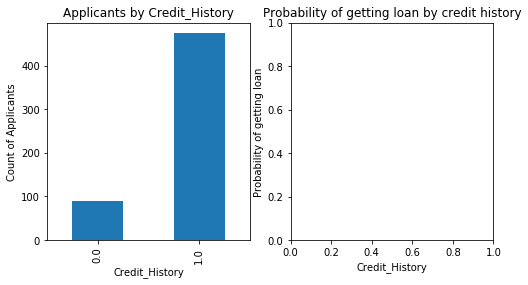

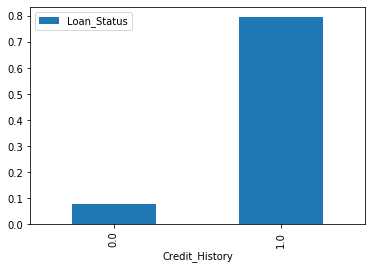

In [12]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,4))

ax1 = fig.add_subplot(121)
ax1.set_xlabel('Credit_History')
ax1.set_ylabel('Count of Applicants')
ax1.set_title('Applicants by Credit_History')
temp1.plot(kind = 'bar')

ax2 = fig.add_subplot(122)
ax2.set_xlabel('Credit_History')
ax2.set_ylabel('Probability of getting loan')
ax2.set_title('Probability of getting loan by credit history')
temp2.plot(kind = 'bar')


Both charts can be visualized by combining them in a stacked chart.

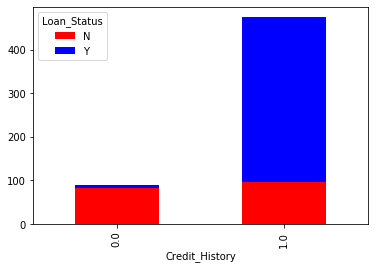

In [13]:
temp3 = pd.crosstab(df_train['Credit_History'], df_train['Loan_Status'])

temp3.plot(kind='bar', stacked=True, color=['red', 'blue'], grid=False)

Now I need to complete a similar analysis to incorporate gender. All I need to do is use the same pivot table but index it by Credit_History and then Gender.

In [14]:
# add gender to pivot table
temp4 = df_train.pivot_table(values=('Loan_Status'), index=['Credit_History', 'Gender'], aggfunc = lambda x: x.map({'Y':1, 'N':0}).mean())

print(temp4)

                       Loan_Status
Credit_History Gender             
0.0            Female     0.058824
               Male       0.086957
1.0            Female     0.761905
               Male       0.803665


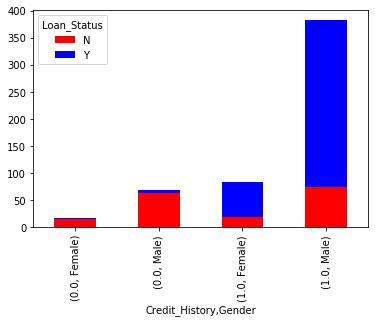

In [15]:
temp5 = pd.crosstab([df_train.Credit_History, df_train.Gender], df_train.Loan_Status)

temp5.plot(kind='bar', stacked=True, color=['red', 'blue'], grid=False)

#### Data Munging in Python

The problems that need to be solved with data munging are as follows:

1. Missing values in some features. We will estimate those values depending on the amount of missing values and expected importance of the feature.

2. ApplicantIncome and LoanAmount contain extreme values. We need to determine a better distribution method.

3. Look at non-numerical fields to determine whether they contain useful information. (Gender, Property_Area, Married, Education and Dependents)

#### Missing Values

In [16]:
# find all null values
df_train.apply(lambda x: sum(x.isnull()), axis=0)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [17]:
# fill in the missing values of LoanAmount with mean value
df_train['LoanAmount'].fillna(df_train['LoanAmount'].mean(), inplace=True)

Another method could be to build a supervised learning model to predict loan amount on the basis of other features. But that's a little extreme. The next step is to use a boxplot to determine whether there is a relationship between education and self employment to the loan amount.

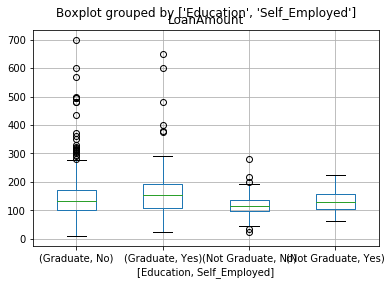

In [18]:
df_train.boxplot(column=('LoanAmount'), by=['Education', 'Self_Employed'])

There are missing val|ues in Self_Employed. So we look at a frequency table to determine how to best manage those values.

In [19]:
df_train['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

A majority of these values are no, approximately 86%, actually. So it is safe to assume the missing values are no.

In [20]:
df_train['Self_Employed'].fillna('No', inplace=True)

# confirmation the code ran
print("Self_Employed Values replaced")

Self_Employed Values replaced


Create a pivot table with the median values for all groups of unique values of Self_Employed and Education features.

In [25]:
table = df_train.pivot_table(values='LoanAmount', index='Self_Employed', columns='Education', aggfunc=np.median)

# Define function to return value of this pivot_table

def fage(x):
    return table.loc[x['Self_Employed'], x['Education']]

# Replace missing values

df_train['LoanAmount'].fillna(df_train[df_train['LoanAmount'].isnull()].apply(fage, axis=1), inplace=True)


TypeError: "value" parameter must be a scalar, dict or Series, but you passed a "DataFrame"

#### Handling the extreme values in distribution of LoanAmount and Applicant income


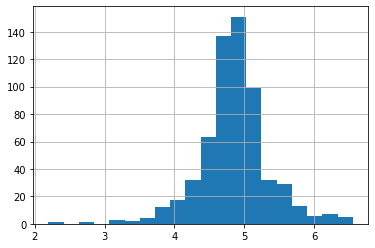

In [23]:
df_train['LoanAmount_log'] = np.log(df_train['LoanAmount'])
df_train['LoanAmount_log'].hist(bins=20)

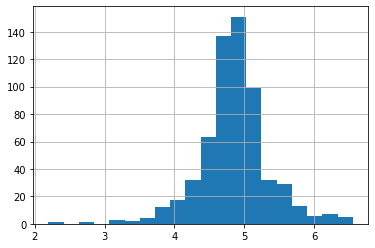

In [24]:
df_train['TotalIncome'] = df_train['ApplicantIncome'] + df_train['CoapplicantIncome']
df_train['TotalIncome_log'] = np.log(df_train['TotalIncome'])
df_train['LoanAmount_log'].hist(bins=20)

Now I need to replace missing values in Gender, Married, Dependents, Loan_Amount_term and Credit_History

#### Gender

In [22]:
print(df_train['Gender'].value_counts(ascending=True))

Female    112
Male      489
Name: Gender, dtype: int64


In [26]:
df_train.mean(level="Gender")

ValueError: level name Gender is not the name of the index